In [1]:
import pandas as pd
import warnings 
import numpy as np
import talib
import talib.abstract as abstract

warnings.filterwarnings('ignore')

df = pd.read_csv('../price.csv',index_col=['stock_id','date'],parse_dates=['date'])
df = df.rename(columns={
    '開盤價':'open',
    '最高價':'high',
    '最低價':'low',
    '收盤價':'close',
    '成交金額':'volume'
})
df = df[['open','high','low','close','volume']]
df = df.loc[df['volume']>0]
df = df.apply(pd.to_numeric,errors='coerce')
df = df.loc['2330']
df

,open,high,low,close,volume
date,,,,,
2007-01-02,67.8,68.0,67.3,67.7,1768131919
2007-01-03,67.8,68.7,67.5,68.0,2875024398
2007-01-04,67.7,68.1,67.6,67.7,1514454033
2007-01-05,67.5,67.7,66.5,66.9,2048997239
2007-01-08,66.1,66.5,65.7,65.8,1595029837
...,...,...,...,...,...
2022-06-20,500.0,502.0,495.0,498.0,18267359790
2022-06-21,501.0,505.0,499.0,505.0,17298234720
2022-06-22,501.0,503.0,494.5,494.5,16630857096


<AxesSubplot:xlabel='date'>

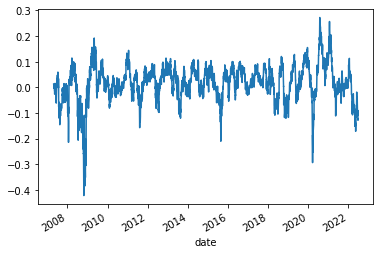

In [7]:
bias1 = (df['close']-df['close'].rolling(n1).mean())/df['close']
bias1.plot()

5 7 -0.10999999999999993 0.01 5.0
5 7 -0.10999999999999993 0.03 29.0
5 7 -0.10999999999999993 0.060000000000000005 49.5
5 7 -0.10999999999999993 0.06999999999999999 390.5
5 7 -0.09999999999999992 0.06999999999999999 400.85
5 7 -0.09999999999999992 0.11 452.35
5 7 -0.08999999999999991 0.06999999999999999 571.5
5 7 -0.0799999999999999 0.06999999999999999 587.1
5 7 -0.05999999999999989 0.06999999999999999 597.9
7 9 -0.0799999999999999 0.08 598.15
11 13 -0.15999999999999998 0.11 611.85
11 13 -0.13999999999999996 0.11 612.0
13 15 -0.15999999999999998 0.12 612.6


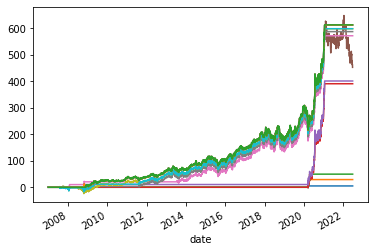

In [10]:
highest_earning = 0

for n1 in range(5,30,2):
    for n2 in range(5,30,2):
        
        if n2>n1:
            bias1 = (df['close']-df['close'].rolling(n1).mean())/df['close']
            bias2 = (df['close']-df['close'].rolling(n2).mean())/df['close']

            for n1Low in np.arange(-0.2,-0.01,0.01):
                for n1High in np.arange(0.01,0.2,0.01):

                    df['hold'] = np.nan
                    df.loc[(bias1>n1Low)&(bias2<n1Low),'hold'] = 1
                    df.loc[(bias1<n1High)&(bias2>n1High),'hold'] = 0

                    df['hold'].ffill(inplace=True)
                    df['hold'] = df['hold'].fillna(0)

                    df['earn'] = 0
                    df['earn'].loc[df['hold']==1] = df['open'].shift(-2)-df['open'].shift(-1)

                    if df['earn'].cumsum().dropna().iloc[-1]>highest_earning:
                        print(n1,n2,n1Low,n1High,df['earn'].cumsum().dropna().iloc[-1])
                        df['earn'].cumsum().plot()
                        highest_earning = df['earn'].cumsum().dropna().iloc[-1] 

29 29 -0.01999999999999985 0.19 612.6


Start date,2007-01-02
End date,2022-06-24
Total months,181
,Backtest
Annual return,18.164%
Cumulative returns,1149.649%
Annual volatility,22.382%
Sharpe ratio,0.86
Calmar ratio,0.65
Stability,0.96
Max drawdown,-28.09%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,28.09,2020-01-10,2020-03-17,2020-07-10,131
1,24.25,2015-03-19,2015-08-21,2016-03-15,259
2,22.08,2018-09-04,2019-01-02,2019-09-27,279
3,20.79,2013-05-07,2013-08-19,2014-03-31,235
4,20.46,2018-01-22,2018-06-26,2018-09-04,162


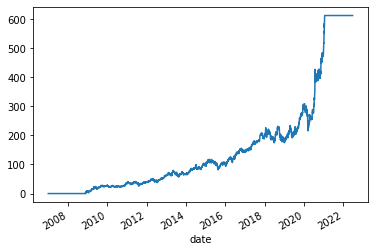

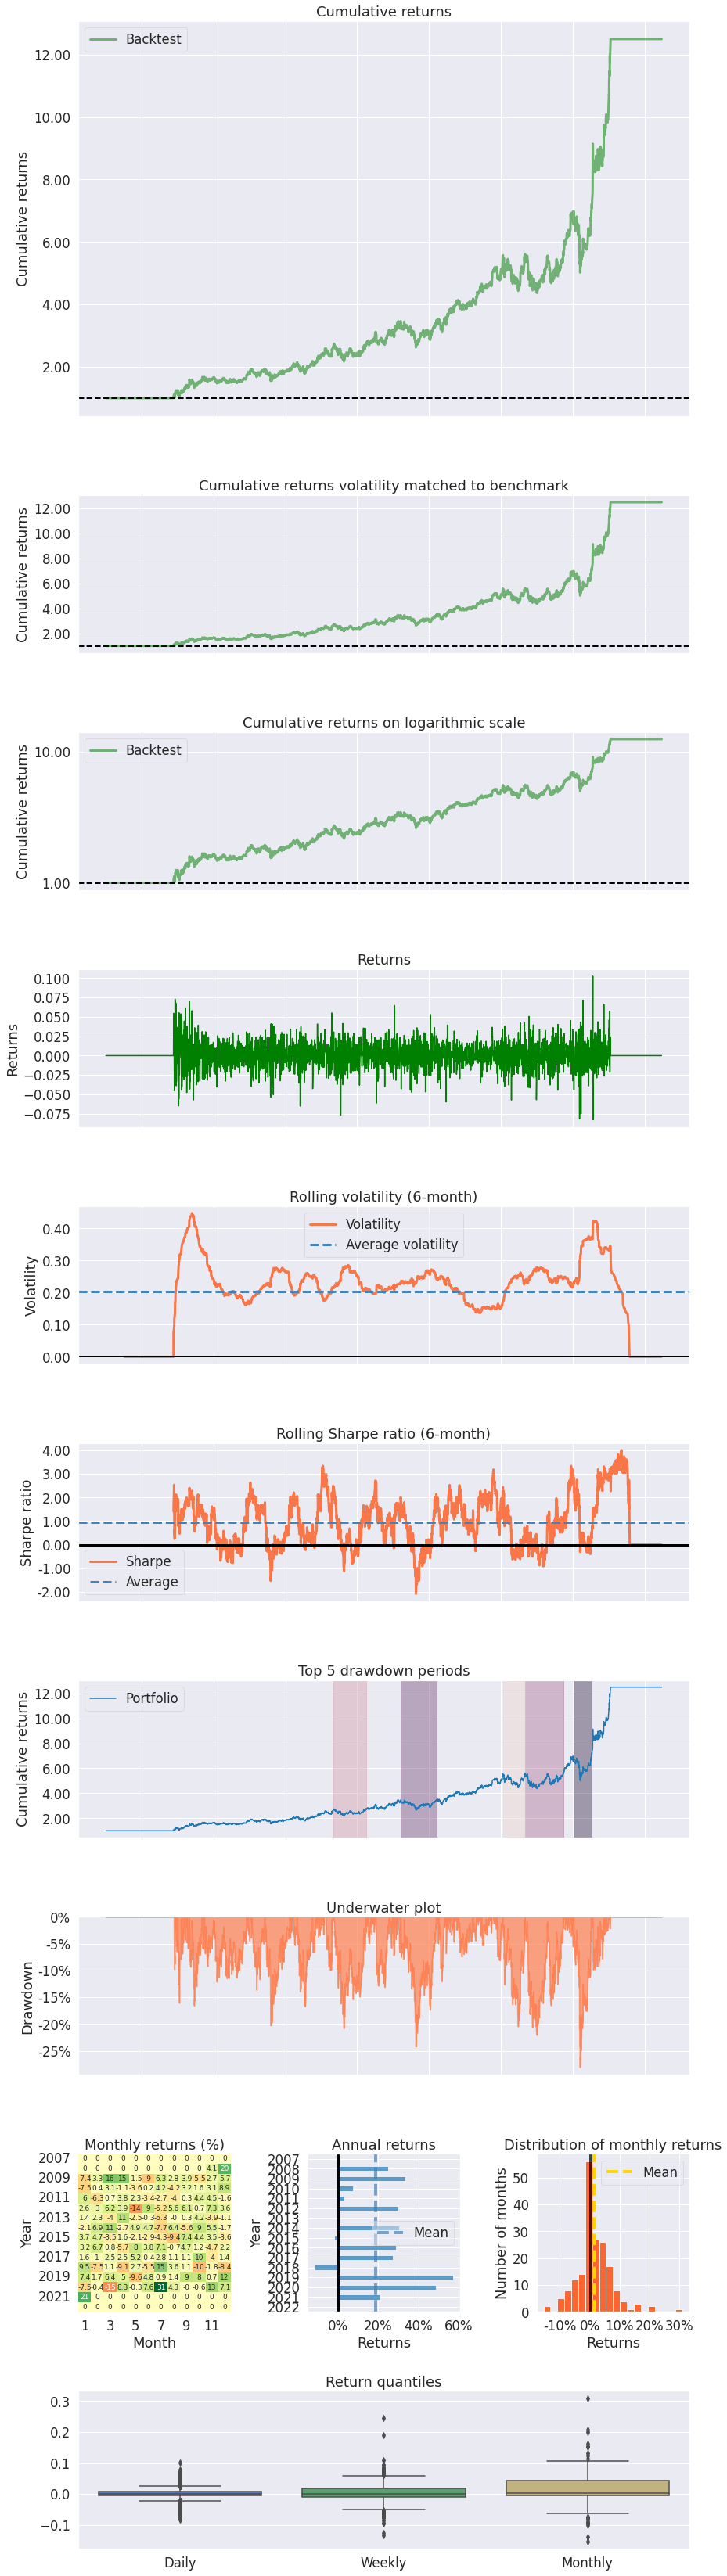

In [13]:
highest_earning = 0


bias1 = (df['close']-df['close'].rolling(13).mean())/df['close']
bias2 = (df['close']-df['close'].rolling(15).mean())/df['close']


df['hold'] = np.nan
df.loc[(bias1>-0.159)&(bias2<-0.159),'hold'] = 1
df.loc[(bias1<0.12)&(bias2>0.12),'hold'] = 0

df['hold'].ffill(inplace=True)
df['hold'] = df['hold'].fillna(0)

df['earn'] = 0
df['earn'].loc[df['hold']==1] = df['open'].shift(-2)-df['open'].shift(-1)

print(n1,n2,n1Low,n1High,df['earn'].cumsum().dropna().iloc[-1])
df['earn'].cumsum().plot()

import pyfolio as pf
pf.create_returns_tear_sheet(df['earn']/df['close'].shift(-1))